###1. Carga y Exploración de Datos:

* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.

In [14]:
# Cargar el dataset y revisar la estructura básica
import pandas as pd

df = pd.read_csv('WineQT.csv')

print("Primeros registros:")
print(df.head())

Primeros registros:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8    

In [15]:
# Eliminación de la columna id
df = df.drop('Id', axis=1)

* Describir las variables y su distribución.

In [16]:
print("\n\nDescripción general:")
print(df.describe())

print("\n\nInformación general:")
print(df.info())



Descripción general:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000       

* Identificar y tratar valores nulos y outliers.

In [17]:
# Identifación de valores nulos
print("Valores nulos:")
print(df.isnull().sum())

Valores nulos:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [26]:
# Cantidad y Porcentaje de outliers por columna
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percentage = len(outliers) / len(df) * 100
    print(f'Columna "{column}": \nCantidad: {len(outliers)}\tPorcentaje: {percentage:.2f}%\n')

Columna "fixed acidity": 
Cantidad: 44	Porcentaje: 3.85%

Columna "volatile acidity": 
Cantidad: 14	Porcentaje: 1.22%

Columna "citric acid": 
Cantidad: 1	Porcentaje: 0.09%

Columna "residual sugar": 
Cantidad: 110	Porcentaje: 9.62%

Columna "chlorides": 
Cantidad: 77	Porcentaje: 6.74%

Columna "free sulfur dioxide": 
Cantidad: 18	Porcentaje: 1.57%

Columna "total sulfur dioxide": 
Cantidad: 40	Porcentaje: 3.50%

Columna "density": 
Cantidad: 36	Porcentaje: 3.15%

Columna "pH": 
Cantidad: 20	Porcentaje: 1.75%

Columna "sulphates": 
Cantidad: 43	Porcentaje: 3.76%

Columna "alcohol": 
Cantidad: 12	Porcentaje: 1.05%

Columna "quality": 
Cantidad: 22	Porcentaje: 1.92%



###2. Preprocesamiento de Datos:

* Seleccionar características importantes para la clasificación.
* Transformar variables categóricas en variables numéricas si es necesario.
* Dividir los datos en conjuntos de entrenamiento y prueba.
* Escalar las características.

In [31]:
# Seleccionar características importantes para la clasificación.
X = df.drop('quality', axis=1)
y = df['quality']

# Transformar variables categóricas en variables numéricas si es necesario.
"""No es necesario transformar debido a que todas las columnas son numéricas"""

# Dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Escalar las características.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###3. Entrenamiento de Modelos de Clasificación:

* Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
* Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

* Entrenamiento por KNN

In [35]:
# Entrenar mediante KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hiperparámetro KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Crear modelo KNN
knn = KNeighborsClassifier()

# Validación cruzada
grid_search_knn = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Mejores hiperparámetros KNN:", grid_search_knn.best_params_)

Mejores hiperparámetros KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


* Entrenamiento por RandomForest

In [36]:
# Hiperparámetro RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear modelo RandomForest
rf = RandomForestClassifier()

# Validación cruzada
grid_search_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Mejores hiperparámetros Random Forest:", grid_search_rf.best_params_)

Mejores hiperparámetros Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


* Entrenamiento por Regresión Logística

In [38]:
# Hiperparámetro de Regresión Logística
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Crear modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Validación cruzada
grid_search_logreg = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
print("Mejores hiperparámetros Regresión Logística:", grid_search_logreg.best_params_)

Mejores hiperparámetros Regresión Logística: {'C': 1, 'solver': 'lbfgs'}


###4. Evaluación de Modelos:

* Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
* Generar un informe de clasificación para cada modelo.
* Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluación del modelo KNN
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
print("KNN - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))  # Aquí genero el reporte que incluye precisión, recall, F1-Score
print(f"\nExactitud: {accuracy_score(y_test, y_pred_knn):.2f}")  # Exactitud global
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))

# Evaluación del modelo Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("\n\nRandom Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))  # Aquí genero el reporte que incluye precisión, recall, F1-Score
print(f"\nExactitud: {accuracy_score(y_test, y_pred_rf):.2f}")  # Exactitud global
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluación del modelo Regresión Logística
y_pred_logreg = grid_search_logreg.best_estimator_.predict(X_test)
print("\n\nRegresión Logística - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_logreg))  # Aquí genero el reporte que incluye precisión, recall, F1-Score
print(f"\nExactitud: {accuracy_score(y_test, y_pred_logreg):.2f}")  # Exactitud global
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logreg))

KNN - Reporte de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.70      0.69        96
           6       0.61      0.61      0.61        99
           7       0.59      0.73      0.66        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.38      0.41      0.39       229
weighted avg       0.62      0.64      0.63       229


Exactitud: 0.64

Matriz de Confusión:
[[ 0  4  2  0  0]
 [ 0 67 28  1  0]
 [ 0 27 60 12  0]
 [ 0  0  7 19  0]
 [ 0  0  2  0  0]]


Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.79      0.75        96
           6       0.65      0.66      0.65        99
           7       0.71      0.58      0.64        26
           8       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [48]:
y_test.unique()

array([5, 6, 8, 7, 4])

* Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

[5 6 8 7 4]


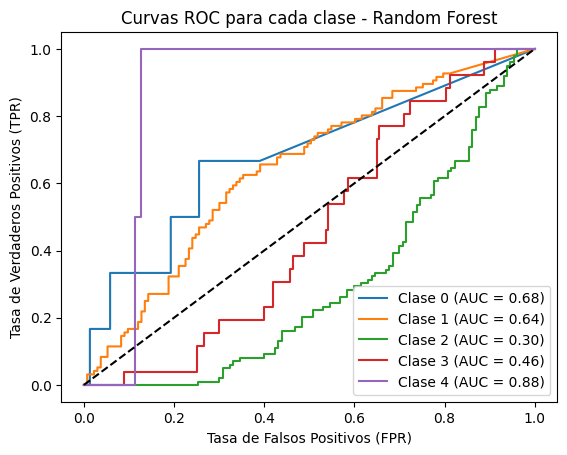

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

print(y_test.unique())
# Binarizar las etiquetas para el problema multiclase
y_test_binarized = label_binarize(y_test, classes=[4, 5, 6, 7, 8])
n_classes = y_test_binarized.shape[1]

# Usar OneVsRestClassifier para el mejor modelo, en este caso Random Forest
best_model = grid_search_rf.best_estimator_
classifier = OneVsRestClassifier(best_model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Calcular ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Visualización de la Curva ROC para cada clase
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia para un clasificador aleatorio
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase - Random Forest')
plt.legend(loc="lower right")
plt.show()

###5. Análisis y Comparación de Resultados:

* Comparar el rendimiento de los diferentes modelos.
* Discutir cuál modelo ofrece el mejor rendimiento y por qué.
* Identificar las fortalezas y debilidades de cada enfoque en este contexto.

##Análisis de la Curva ROC y AUC
###1. Interpretación de los Valores de AUC por Clase:

* **Clase 0**: AUC = 0.68. Este valor indica un rendimiento moderado en la predicción de esta clase. El modelo logra cierto grado de discriminación, pero no es excelente.
* **Clase 1**: AUC = 0.64. Similar al caso anterior, el modelo tiene un rendimiento moderado para esta clase. La capacidad de discriminación es aceptable, pero aún podría mejorarse.
* **Clase 2**: AUC = 0.30. Este valor bajo sugiere que el modelo tiene dificultades para predecir correctamente la Clase 2. La curva está cerca de la línea de referencia (0.5), lo que indica que el modelo se comporta casi como un clasificador aleatorio para esta clase.
* **Clase 3**: AUC = 0.46. Este valor también está cerca de 0.5, lo que indica que el modelo no logra una buena discriminación para la Clase 3.
* **Clase 4**: AUC = 0.88. Este es el mejor AUC de todas las clases, lo que indica que el modelo predice bien la Clase 4 y puede discriminar adecuadamente entre la Clase 4 y las demás clases.

###2. Conclusiones Basadas en el AUC:

* **Rendimiento General del Modelo**: Aunque el modelo de Random Forest ha mostrado ser el mejor de los tres modelos entrenados, su rendimiento varía bastante entre las clases. Mientras que tiene un buen rendimiento en la Clase 4 (AUC = 0.88), su rendimiento es moderado en las Clases 0 y 1, y deficiente en las Clases 2 y 3.
* **Desafíos en Clases Específicas**: Las Clases 2 y 3 presentan los AUC más bajos, indicando que el modelo tiene dificultades para distinguir correctamente estas clases de las demás. Esto podría deberse a la falta de datos suficientes para estas clases, o a que las características no son lo suficientemente discriminativas para estas clases específicas.
###3. Fortalezas y Debilidades del Modelo de Random Forest:

* **Fortalezas**:
    * Buen rendimiento en general en comparación con los otros modelos (KNN y Regresión Logística).
    * Alta capacidad de discriminación para la Clase 4, lo que indica que puede ser confiable para clasificar muestras de esta clase.
* **Debilidades**:
    * Rendimiento inconsistente entre las clases. Las Clases 2 y 3 presentan bajos valores de AUC, lo que podría indicar problemas para distinguir estas clases en particular.
    * Debido a la variabilidad en el rendimiento entre clases, el modelo podría no ser óptimo para aplicaciones donde es necesario un alto grado de precisión en todas las clases.